#**Sales_prediction**

**1. Import Libraries**

---



In [ ]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**2. Imporing Dataset**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Advertising.csv')

# Explore the dataset
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


**3. Data Preprocessing**

---



In [ ]:
#print top 5 rows
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#print botton 5 rows
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
#shape of data
df.shape

(200, 5)

In [ ]:
#summary statistics for numerical columns
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Checking missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**4. Visualization**

---



Unnamed: 0       Axes(0.125,0.712609;0.168478x0.167391)
TV            Axes(0.327174,0.712609;0.168478x0.167391)
Radio         Axes(0.529348,0.712609;0.168478x0.167391)
Newspaper     Axes(0.731522,0.712609;0.168478x0.167391)
Sales            Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

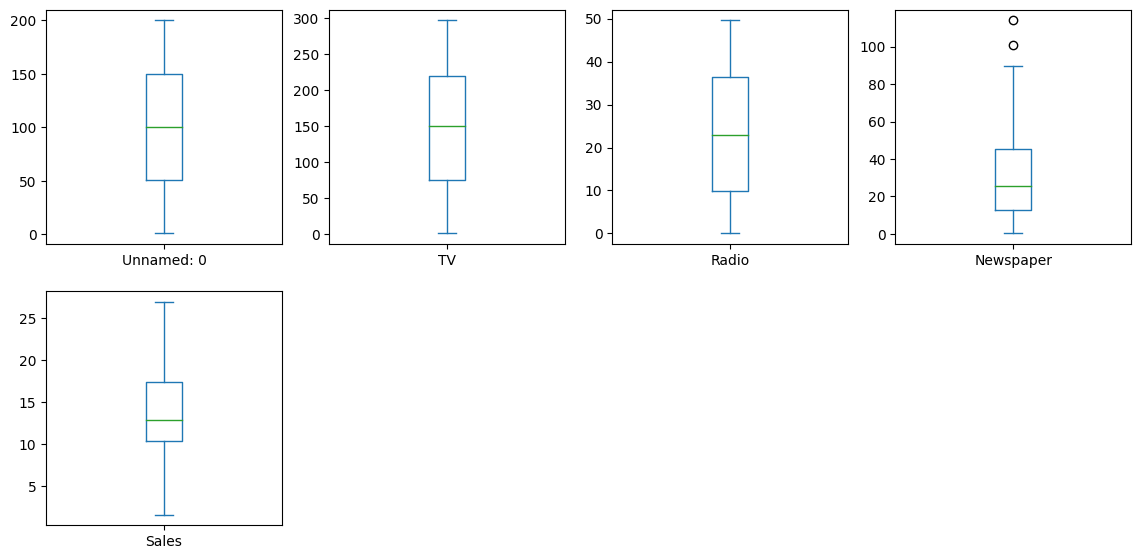

In [ ]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 14))

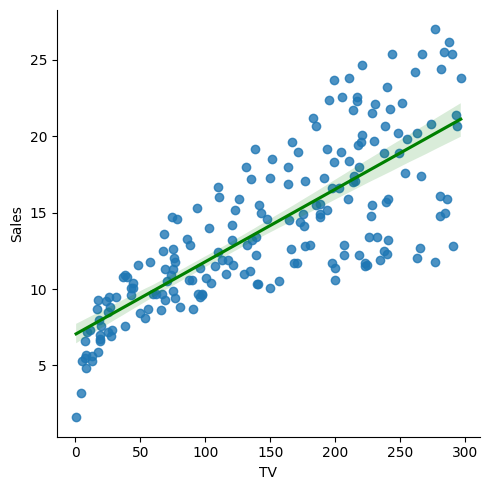

In [ ]:
import seaborn as sns
sns.lmplot(x='TV', y='Sales', data=df,line_kws={'color': 'green'})

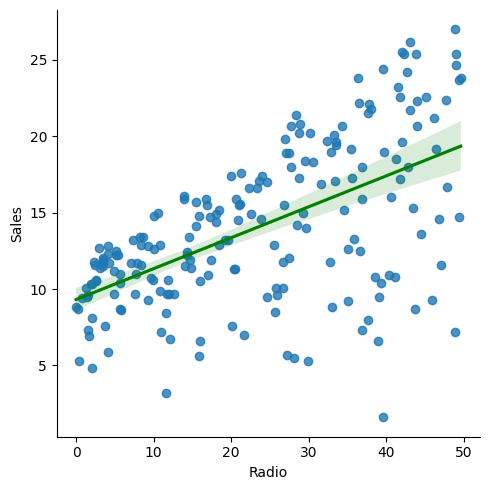

In [ ]:
import seaborn as sns
sns.lmplot(x='Radio', y='Sales', data=df,line_kws={'color': 'green'})

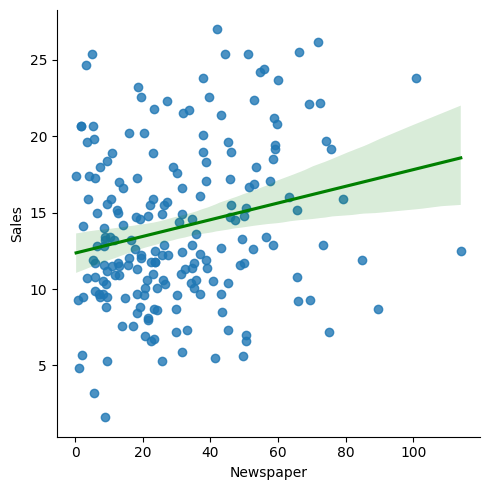

In [ ]:
import seaborn as sns
sns.lmplot(x='Newspaper', y='Sales', data=df,line_kws={'color': 'green'})

**5. Data Preprocessing**

---



In [ ]:
# Assuming Unnamed: 0 is not useful for prediction
sales_data = df.drop(columns=['Unnamed: 0'])

# Check for missing values
print(sales_data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**6. Split the Data**

---



In [ ]:
# Split the Data
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**7. Choose a Model**

---



In [ ]:
# Choose a Model
model = LinearRegression()

**8. Train the Model**

---



In [ ]:
# Train the Model
model.fit(X_train, y_train)

LinearRegression()

**9. Evaluate the Model**

---



In [ ]:
# Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.465060105010293
Mean Squared Error: 3.1990044685889067
R-squared: 0.898648915141708


In [ ]:
print(y_pred)

[16.41227699 20.84319293 21.51186915 10.65309994 22.12405753 13.12383506
 21.03748883  7.50385439 13.64787029 15.12040886  9.02055551  6.70666642
 14.40155146  8.88609041  9.74353333 12.21551975  8.71370868 16.2941451
 10.26802337 18.80498245 19.58864662 13.22318303 12.3647867  21.31473607
  7.79734749  5.78189965 20.74934811 11.95476656  9.199109    8.52178704
 12.40431294  9.94865202 21.36880272 12.25374832 18.29943527 20.13347356
 14.07464638 20.88594679 11.05214979  4.55168744]


**10. Prediction**

---



In [ ]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_pred.flatten()})
act_predict.head(10)

,Actual,Predict
0,16.9,16.412277
1,22.4,20.843193
2,21.4,21.511869
3,7.3,10.653100
4,24.7,22.124058
5,12.6,13.123835
6,22.3,21.037489
7,8.4,7.503854
8,11.5,13.647870
9,14.9,15.120409


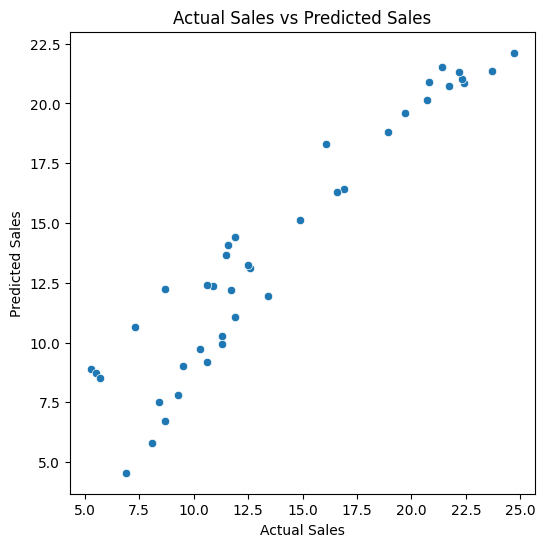

In [ ]:
# Visualization after prediction
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()


<Axes: >

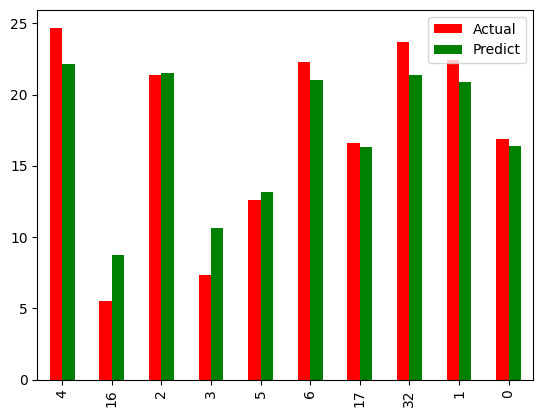

In [ ]:
# graph of actual and predicted
act_predict.sample(10).plot(kind='bar', color=['red', 'green'])